# Classification - Nearest Neighbors

## Project Details



Jupyter notebook, Panda, and scikit is used.

1) Load iris dataset from sklearn datasets. 


2) Split your dataset 70% for training, and 30% for testing the classifier. 


3) Select only 2 attributes for training and testing your model. 


4) Use Euclidean distance. 


5) Test the classifier with three diferent numbers for neighbors and record the results. 


6) Use comments to explain your code and variable names.


7) Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, and support) for all three different numbers.


8) Plot the classifier in a 2D projection for all three different numbers.

Confusion matrix when number of neighbors is  3 :
[[16  0  0]
 [ 0  8 10]
 [ 0  2  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.80      0.44      0.57        18
   virginica       0.47      0.82      0.60        11

    accuracy                           0.73        45
   macro avg       0.76      0.75      0.72        45
weighted avg       0.79      0.73      0.73        45



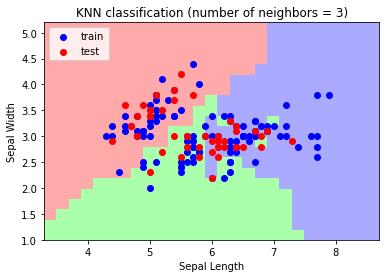

Confusion matrix when number of neighbors is  5 :
[[16  0  0]
 [ 0  9  9]
 [ 0  3  8]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.75      0.50      0.60        18
   virginica       0.47      0.73      0.57        11

    accuracy                           0.73        45
   macro avg       0.74      0.74      0.72        45
weighted avg       0.77      0.73      0.74        45



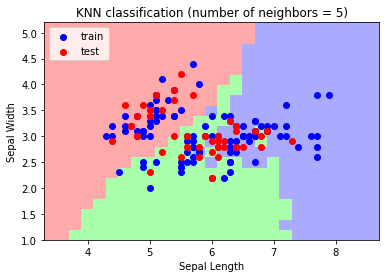

Confusion matrix when number of neighbors is  7 :
[[16  0  0]
 [ 0  9  9]
 [ 0  2  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.82      0.50      0.62        18
   virginica       0.50      0.82      0.62        11

    accuracy                           0.76        45
   macro avg       0.77      0.77      0.75        45
weighted avg       0.81      0.76      0.76        45



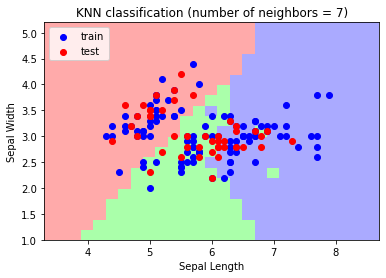

In [ ]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

# This code trains a model based on iris dataset to identify the type of
# flower based on its sepal length and sepal width. KNN classifer is used for the model. Confusion
# matrix for different values of neighbors(3, 5, 7) is made for different values of neighbors. Precision, recall, 
# f1-score, and support for each value is computed. The classifier is plotted in a 2-D projection.

from sklearn import datasets
import sklearn.neighbors as sk
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# importing data 3 different types of irises'
iris = datasets.load_iris()
X = iris.data[:, :2]  # taking the first two features
Y = iris.target # Y holds target values representing the type of flower
names = iris.target_names # names holds the name of the flowers


#the training data is split into training and testing sets in a ratios of 7:3
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

h=0.2 # step for plotting
neighbors = [3,5,7] # neighbors holds different values for neighbors
for k in neighbors:
    # defining a KNN classifier working in Euclidean Distance
    classifier = sk.KNeighborsClassifier(n_neighbors =  k, metric = 'minkowski', p =2)
    classifier.fit(X_train, Y_train)
    Y_pred     = classifier.predict(X_test) #Y_pred hold values predicted based on X_test
    cm         = confusion_matrix(Y_test, Y_pred) # cm is the confusion matrix
    print('Confusion matrix when number of neighbors is ',k,':')
    print(cm)# Printing the cnfusion matrix
    
    # Printing precision, recall, f1-score, and support
    print(classification_report(Y_test,Y_pred,target_names=names))                                                                   
    
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
    # Getting limits of the grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Plotting the graph
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X_train[:,0], X_train[:,1], c='b', cmap=cmap_bold, marker='o', label='train')
    plt.scatter(X_test[:,0], X_test[:,1], c='r', cmap=cmap_bold, marker='o', label='test')
    plt.legend(loc = 'upper left')      
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("KNN classification (number of neighbors = %i)"% (k))
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.show()   